课件“运筹学简介”的P20中介绍了不能完全可分情况下的支持向量机的建模方法。请随机生成10个2维点作为A集合，再随机生成10个2维点作为B集合。建立课件所示线性规划模型，利用COPT求解此问题最优解。提交资料：
- 绘制图像：画出A、B集合中的所有点和优化求解所得分隔线（如课件图所示），
- 代码打印附在作业后面
（注：在随机生成的2维点$(x_1,x_2)$过程中，可以自己定义A集合和B集合点的区间，点在区间内可以是均匀分布。只要生成结果是课件中不可分情况就可以）

In [1]:
# 生成随机点
import numpy as np
from sklearn.datasets import make_blobs

np.random.seed(42)

centers = [[0, 0], [2, 2]]
cluster_std = [1.5, 1.5]

A, _ = make_blobs(n_samples=10, centers=[centers[0]], cluster_std=cluster_std[0])
B, _ = make_blobs(n_samples=10, centers=[centers[1]], cluster_std=cluster_std[1])

In [2]:
# 使用COPT求解器求解
import coptpy

env = coptpy.Envr()
model = env.createModel("lp_example")

delta = model.addMVar(shape=(10,), nameprefix="δ")
sigma = model.addMVar(shape=(10,), nameprefix="σ")
a = model.addMVar(shape=(2,), lb=-coptpy.COPT.INFINITY, nameprefix="a")
b = model.addVar(lb=-coptpy.COPT.INFINITY, name="b")

for i in range(10):
    model.addConstr(a * A[i] + b + delta[i] >= 1)
for i in range(10):
    model.addConstr(a * B[i] + b - sigma[i] <= -1)

model.setObjective(sum(delta) + sum(sigma), sense=coptpy.COPT.MINIMIZE)

model.solve()

if model.status == coptpy.COPT.OPTIMAL:
    print("Objective value: {}".format(model.objval))
    print("Solving Time: {} seconds".format(model.SolvingTime))

    allvars = model.getVars()

    print("Variable solution:")
    for var in allvars:
        print("{0}: {1}".format(var.name, var.x))

Cardinal Optimizer v7.1.1. Build date Mar  4 2024
Copyright Cardinal Operations 2024. All Rights Reserved

Model fingerprint: 1f5ee5e9

Using Cardinal Optimizer v7.1.1 on Windows
Hardware has 12 cores and 16 threads. Using instruction set X86_AVX2 (10)
Minimizing an LP problem

The original problem has:
    40 rows, 23 columns and 120 non-zero elements
The presolved problem has:
    23 rows, 40 columns and 120 non-zero elements

Starting the simplex solver using up to 8 threads

Method   Iteration           Objective  Primal.NInf   Dual.NInf        Time
Dual             0    4.4400634408e+01           23           0       0.01s
Dual            24    1.6026407448e+01            0           0       0.01s
Postsolving
Dual            24    1.6026186312e+01            0           0       0.01s
Dual            24    1.6026186312e+01            0           0       0.02s
Dual            24    1.6026186312e+01            0           0       0.02s

Solving finished
Status: Optimal  Objective: 1.

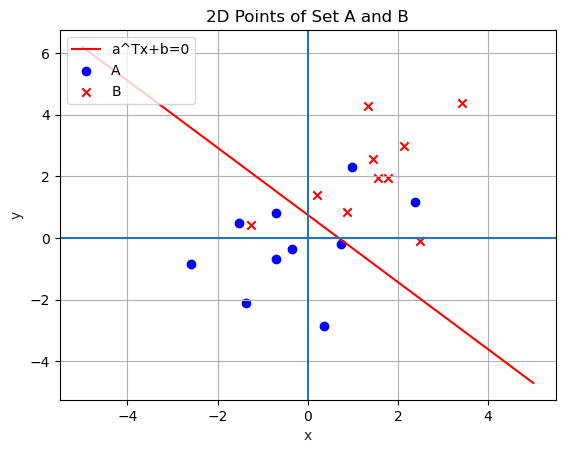

In [3]:
# 绘图
import matplotlib.pyplot as plt

a = np.array([allvars.getVar(20).x, allvars.getVar(21).x])
b = allvars.getVar(22).x

m = -a[0] / a[1]
c = -b / a[1]

x = np.linspace(-5, 5, 100)
y = m * x + c

plt.plot(x, y, "-r", label="a^Tx+b=0")
plt.scatter(A[:, 0], A[:, 1], color="blue", marker="o", label="A")
plt.scatter(B[:, 0], B[:, 1], color="red", marker="x", label="B")

plt.title("2D Points of Set A and B")
plt.xlabel("x", color="#1C2833")
plt.ylabel("y", color="#1C2833")
plt.legend(loc="upper left")
plt.grid()
plt.axhline()
plt.axvline()
plt.show()